In [1]:
import glob
import torch
import numpy as np

from PIL import Image
from torchmetrics.image.kid import KernelInceptionDistance

print("Packages successfully imported!")

Packages successfully imported!


In [10]:
REAL_IMAGES_FOLDER = "validation_images/"
FAKE_IMAGES_FOLDER = "/Users/ben/Desktop/test/blah/pretrained-images/"
GENERATED_IMAGES_FOLDER = "/Users/ben/Desktop/test/blah/out_images_50/*"

real_images, fake_images, generated_images = [], [], []

for filename in glob.glob(REAL_IMAGES_FOLDER + "*"):
    real_images.append(Image.open(filename))

print(f"Loaded {len(real_images)} real images...")

for filename in glob.glob(FAKE_IMAGES_FOLDER + "*"):
    fake_images.append(Image.open(filename))

print(f"Loaded {len(fake_images)} fake images...")

for filename in glob.glob(GENERATED_IMAGES_FOLDER):
    generated_images.append(Image.open(filename))

print(f"Loaded {len(generated_images)} generated images...")

real_images, fake_images, generated_images = torch.Tensor(np.array(real_images)), torch.Tensor(np.array(fake_images)), torch.Tensor(np.array(generated_images))
real_images, fake_images, generated_images = torch.transpose(real_images, 2, 3), torch.transpose(fake_images, 2, 3), torch.transpose(generated_images, 2, 3)
real_images, fake_images, generated_images = torch.transpose(real_images, 1, 2), torch.transpose(fake_images, 1, 2), torch.transpose(generated_images, 1, 2)
real_images, fake_images, generated_images = real_images / 255.0, fake_images / 255.0, generated_images / 255.0
print("Successfully loaded images!")

Loaded 20 real images...
Loaded 20 fake images...
Loaded 20 generated images...
Successfully loaded images!


In [11]:
kid = KernelInceptionDistance(subset_size=10, normalize=True, reset_real_features=False) # Change sample size to reflect number of images
kid.update(real_images, real=True)
kid.update(fake_images, real=False)
control_mean, control_stddev = kid.compute()

print(f"Control: Mean ({control_mean}), Standard Deviation ({control_stddev})")

kid.reset()

kid.update(generated_images, real=False)
experimental_mean, experimental_stddev = kid.compute()
print(f"Experimental: Mean ({experimental_mean}), Standard Deviation ({experimental_stddev})")

Control: Mean (0.03619927540421486), Standard Deviation (0.009577129036188126)
Experimental: Mean (0.03811965137720108), Standard Deviation (0.009905502200126648)


lr-1: 

Control: Mean (0.04024304449558258), Standard Deviation (0.00946993287652731)

Experimental: Mean (0.04276755452156067), Standard Deviation (0.011143743991851807)


lr-4:

Control: Mean (0.040478676557540894), Standard Deviation (0.009921169839799404)

Experimental: Mean (0.036905743181705475), Standard Deviation (0.007683111820369959)


lr-16:

Control: Mean (0.040262870490550995), Standard Deviation (0.010951533913612366)

Experimental: Mean (0.033392224460840225), Standard Deviation (0.00789774488657713)

(0.0, 0.05)

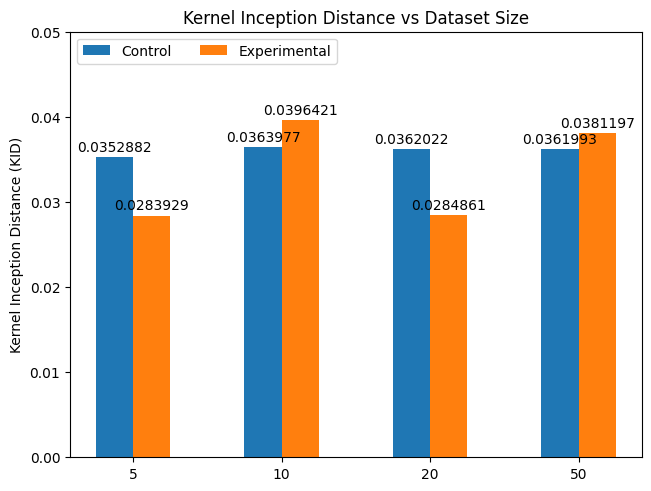

In [13]:
import matplotlib.pyplot as plt

groups = ("5", "10", "20", "50")
vals = {
    "Control": (0.03528815507888794, 0.03639769181609154, 0.036202169954776764, 0.03619927540421486),
    "Experimental": (0.0283928532153368, 0.039642058312892914, 0.02848607860505581, 0.03811965137720108)
}

x = np.arange(len(groups))
width = 0.25
multiplier = 0.5

fix, ax = plt.subplots(layout="constrained")

for attribute, measurement in vals.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=2)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Kernel Inception Distance (KID)')
ax.set_title('Kernel Inception Distance vs Dataset Size')
ax.set_xticks(x + width, groups)
ax.legend(loc='upper left', ncols=2)
ax.set_ylim(0, 0.05)

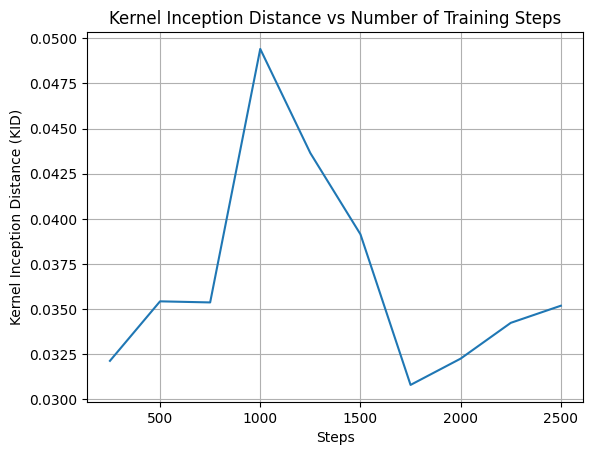

In [53]:
x = np.array([250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500])
y = np.array([0.03213977813720703, 0.035435162484645844, 0.03537469729781151, 0.049412500113248825, 0.043644677847623825, 0.03914688900113106, 0.03080684505403042, 0.03226383402943611, 0.03424368053674698, 0.035192422568798065])

fig, ax = plt.subplots()
ax.plot(x, y)

ax.set(xlabel='Steps', ylabel='Kernel Inception Distance (KID)',
       title='Kernel Inception Distance vs Number of Training Steps')
ax.grid()

plt.show()